In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

what is the goal that you are trying to accomplish here?
to get bins of the population data 


*how to split the column into county and into state<br>
*then you can filter out by state

In [2]:
obesity_2016_df = pd.read_csv('obesity2016.csv')
obesity_2016_df.head(20)
obesity_2016_df = obesity_2016_df[["County","CountyFIPS","Percentage"]]
obesity_2016_df.head()

,County,CountyFIPS,Percentage
0,Alameda County,6001,19.2
1,Alpine County,6003,20.9
2,Amador County,6005,29.8
3,Butte County,6007,27.2
4,Calaveras County,6009,30.4


In [3]:
obesity_2011_df = pd.read_csv('obesity2011.csv')
obesity_2011_df.head(20)
obesity_2011_df = obesity_2011_df[["County","Percentage"]]
obesity_2011_df.head()

,County,Percentage
0,Alameda County,20.2
1,Alpine County,22.6
2,Amador County,24.8
3,Butte County,24.2
4,Calaveras County,23.9


In [4]:
merged_obesity_df = pd.merge(obesity_2011_df, obesity_2016_df, how='outer', on='County')

In [5]:
merged_obesity_df.head()

,County,Percentage_x,CountyFIPS,Percentage_y
0,Alameda County,20.2,6001,19.2
1,Alpine County,22.6,6003,20.9
2,Amador County,24.8,6005,29.8
3,Butte County,24.2,6007,27.2
4,Calaveras County,23.9,6009,30.4


In [6]:
merged_obesity_df = merged_obesity_df.rename(columns={"Percentage_x":"2011 Percentage", "Percentage_y":"2016 Percentage"})

In [7]:
merged_obesity_df.head()

,County,2011 Percentage,CountyFIPS,2016 Percentage
0,Alameda County,20.2,6001,19.2
1,Alpine County,22.6,6003,20.9
2,Amador County,24.8,6005,29.8
3,Butte County,24.2,6007,27.2
4,Calaveras County,23.9,6009,30.4


In [8]:
percentage_change = merged_obesity_df["2016 Percentage"] - merged_obesity_df["2011 Percentage"]
merged_obesity_df["Percentage Change"] = percentage_change
merged_obesity_df.head()

,County,2011 Percentage,CountyFIPS,2016 Percentage,Percentage Change
0,Alameda County,20.2,6001,19.2,-1.0
1,Alpine County,22.6,6003,20.9,-1.7
2,Amador County,24.8,6005,29.8,5.0
3,Butte County,24.2,6007,27.2,3.0
4,Calaveras County,23.9,6009,30.4,6.5


In [9]:
merged_obesity_df = merged_obesity_df[["County","CountyFIPS","Percentage Change"]]

In [10]:
merged_obesity_df.to_csv (r'merged_obesity_percentage_change.csv', index = False, header=True)

Broadcasting when you are subtracting?

https://stackoverflow.com/questions/48350850/subtract-two-columns-in-dataframe

>>> val1_minus_val10 = df["Val1"] - df["Val10"]
>>> print(val1_minus_val10)

(array([25., 22.,  9.,  2.]),
 array([-3.8,  1.8,  7.4, 13. , 18.6]),
 <a list of 4 Patch objects>)

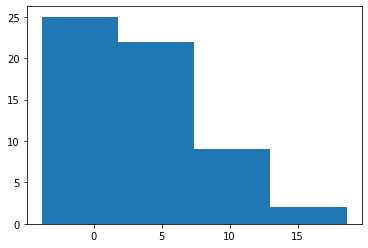

In [11]:
plt.hist(merged_obesity_df["Percentage Change"], bins=4 )

In [10]:
print(merged_obesity_df["Percentage Change"].mean())
print(merged_obesity_df["Percentage Change"].median())
print(merged_obesity_df["Percentage Change"].std())

3.5137931034482754
3.049999999999999
4.778990874756326


In [5]:
len(obesity_df)

58

(array([ 6., 15., 11., 16.,  7.,  3.]),
 array([15.7, 19.9, 24.1, 28.3, 32.5, 36.7, 40.9]),
 <BarContainer object of 6 artists>)

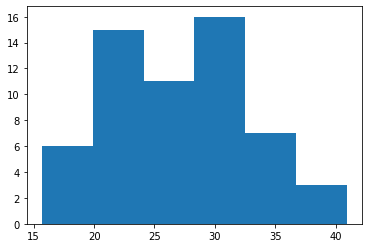

In [10]:
plt.hist(obesity_df["Percentage"], bins=6)

In [8]:
print(obesity_df["Percentage"].mean())
print(obesity_df["Percentage"].median())
print(obesity_df["Percentage"].std())

23.606896551724134
23.65
3.4088564769345706


In [6]:
print(obesity_df["Percentage"].mean())
print(obesity_df["Percentage"].median())
print(obesity_df["Percentage"].std())

27.120689655172413
27.299999999999997
5.842006343074499


In [5]:
population_2016_df = california_data[["County","Population"]]
population_2016_df = population_2016_df.reset_index(drop=True)
population_2016_df.head()

,County,Population
0,Alameda,1605217.0
1,Alpine,1184.0
2,Amador,36963.0
3,Butte,223877.0
4,Calaveras,44787.0


In [6]:
fips_df = pd.read_csv('fips_dataframe.csv')
fips_df = fips_df[["FIPS","CTYNAME"]]
fips_df.head()

,FIPS,CTYNAME
0,6001,Alameda County
1,6003,Alpine County
2,6005,Amador County
3,6007,Butte County
4,6009,Calaveras County


In [7]:
for index, row in fips_df.iterrows():
    county = row["CTYNAME"]
    county_split = county.split(" County")
    fips_df.loc[index, "County"] = str(county_split[0])
        
fips_df.head()

,FIPS,CTYNAME,County
0,6001,Alameda County,Alameda
1,6003,Alpine County,Alpine
2,6005,Amador County,Amador
3,6007,Butte County,Butte
4,6009,Calaveras County,Calaveras


In [8]:
del fips_df["CTYNAME"]

In [10]:
merge_df = pd.merge(population_2016_df, fips_df, on="County")
merge_df = merge_df[["FIPS","County","Population"]]
merge_df.head()

,FIPS,County,Population
0,6001,Alameda,1605217.0
1,6003,Alpine,1184.0
2,6005,Amador,36963.0
3,6007,Butte,223877.0
4,6009,Calaveras,44787.0


In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("population_2016.csv", encoding="utf-8", index=False, header=True)

In [23]:
max(merge_df['Population'])

9787747.0

In [24]:
min(merge_df['Population'])

1167.0

In [35]:
merge_df

,County,Population,Fips
0,Alameda,1494876.0,001
1,Alpine,1167.0,003
2,Amador,38244.0,005
3,Butte,219309.0,007
4,Calaveras,45794.0,009
5,Colusa,21297.0,011
6,Contra Costa,1037817.0,013
7,Del Norte,28561.0,015
8,El Dorado,179878.0,017
9,Fresno,920623.0,019


In [45]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 14999, 59999, 150000, 430000, 2080000, 10000000]
# Create labels for these bins
group_labels = ["0 to 13k", "15k to 59k", "60k to 134k", "135k to 429k", 
               "430k to 2 mil", "2 mil to 10 mil"]

In [46]:
merge_df["Pop Group"] = pd.cut(merge_df["Population"], bins, labels=group_labels)

<AxesSubplot:xlabel='Pop Group'>

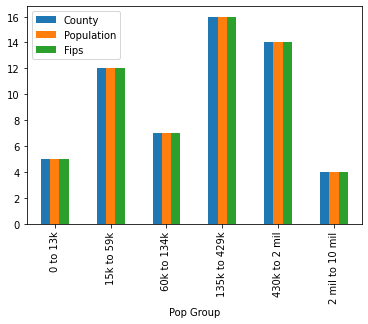

In [57]:
merge_df.groupby('Pop Group').count().plot(kind="bar")

In [88]:
sorted_df["Population"].median()

178554.5

In [65]:
test_series = sorted_df["Population"].values

In [79]:
test_series

array([1.167000e+03, 3.277000e+03, 9.587000e+03, 1.371100e+04,
       1.401600e+04, 1.829000e+04, 1.845700e+04, 2.019200e+04,
       2.129700e+04, 2.802700e+04, 2.856100e+04, 3.500100e+04,
       3.824400e+04, 4.468700e+04, 4.579400e+04, 5.487300e+04,
       5.573600e+04, 6.298500e+04, 6.439200e+04, 7.181700e+04,
       8.752500e+04, 9.419200e+04, 9.839200e+04, 1.335850e+05,
       1.353770e+05, 1.496110e+05, 1.523350e+05, 1.713430e+05,
       1.772310e+05, 1.798780e+05, 1.988890e+05, 2.193090e+05,
       2.506660e+05, 2.536060e+05, 2.594020e+05, 2.678710e+05,
       3.435540e+05, 4.113850e+05, 4.116200e+05, 4.197930e+05,
       4.362340e+05, 4.785510e+05, 5.124690e+05, 6.802770e+05,
       7.116220e+05, 7.979830e+05, 8.157450e+05, 8.292540e+05,
       9.206230e+05, 1.037817e+06, 1.408480e+06, 1.494876e+06,
       1.762754e+06, 2.023452e+06, 2.154844e+06, 2.989948e+06,
       3.060849e+06, 9.787747e+06])

https://data36.com/plot-histogram-python-pandas/

https://mode.com/example-gallery/python_histogram/

https://www.youtube.com/watch?v=snkkKrek7TU
Data camp binning data
making a histogram 

In [51]:
sorted_df = merge_df.sort_values(by="Population")
sorted_df.head()

,County,Population,Fips,Pop Group
1,Alpine,1167.0,003,0 to 13k
45,Sierra,3277.0,091,0 to 13k
24,Modoc,9587.0,049,0 to 13k
52,Trinity,13711.0,105,0 to 13k
25,Mono,14016.0,051,0 to 13k


In [59]:
print(sorted_df["Population"].mean())
print(sorted_df["Population"].std())

637400.0
1410432.107127893


In [61]:
sorted_df["Population"]

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [95]:
new_df = sorted_df.loc[sorted_df["Population"] < 9000000]

(array([36.,  7.,  5.,  2.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([1.1670000e+03, 3.0713520e+05, 6.1310340e+05, 9.1907160e+05,
        1.2250398e+06, 1.5310080e+06, 1.8369762e+06, 2.1429444e+06,
        2.4489126e+06, 2.7548808e+06, 3.0608490e+06]),
 <BarContainer object of 10 artists>)

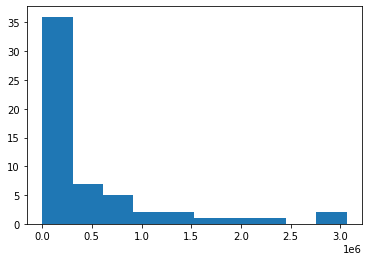

In [96]:
plt.hist(new_df["Population"])

In [91]:
test_again = sorted_df["Population"]
test_again

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [80]:
height = [185, 172, 172, 169, 181, 162, 186, 171, 177, 174, 184, 163, 174, 173, 182, 169, 174, 170, 176, 179, 169, 182, 181, 179, 181, 171, 175, 170, 174, 179, 171, 173, 171, 170, 171, 175, 169, 177, 185, 180, 174, 170, 171, 186, 176, 172, 177, 188, 176, 179, 177, 173, 169, 173, 174, 179, 181, 181, 177, 181, 171, 183, 179, 174, 178, 175, 182, 185, 189, 167, 167, 172, 176, 181, 177, 163, 174, 180, 177, 180, 174, 174, 177, 178, 177, 176, 171, 178, 176, 182, 183, 177, 173, 172, 178, 176, 173, 176, 172, 180, 173, 183, 178, 179, 169, 177, 180, 170, 174, 176, 167, 177, 181, 170, 178, 168, 175, 166, 182, 178, 175, 171, 183, 187, 164, 183, 185, 178, 168, 181, 174, 172, 168, 179, 180, 172, 179, 169, 180, 176, 174, 175, 181, 180, 179, 176, 176, 179, 177, 180, 174, 161, 182, 189, 178, 175, 175, 175, 176, 169, 172, 170, 177, 174, 178, 174, 181, 177, 189, 164, 172, 181, 191, 174, 176, 174, 183, 174, 180, 174, 168, 177, 179, 183, 175, 172, 179, 177, 177, 175, 182, 178, 187, 182, 179, 166, 179, 178, 180, 182, 173, 180, 172, 187, 168, 165, 166, 170, 169, 187, 174, 167, 182, 172, 168, 181, 179, 173, 184, 176, 185, 179, 185, 176, 168, 190, 172, 174, 171, 174, 177, 177, 179, 186, 175, 168, 168, 172, 165, 180, 173, 174, 175, 167, 170, 180, 179, 173, 186, 168]

(array([ 4.,  7., 24., 34., 48., 48., 46., 19., 14.,  6.]),
 array([161., 164., 167., 170., 173., 176., 179., 182., 185., 188., 191.]),
 <BarContainer object of 10 artists>)

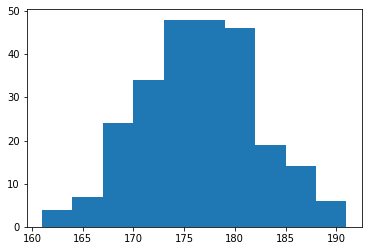

In [81]:
plt.hist(height)

In [85]:
height_array = np.asarray(height)

In [86]:
np.std(height_array)

5.712240891279008

In [89]:
np.median(height_array)

176.0

https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://numpy.org/doc/stable/reference/generated/numpy.std.html


https://stackoverflow.com/questions/33385238/how-to-convert-pandas-single-column-data-frame-to-series-or-numpy-vector

https://mode.com/example-gallery/python_histogram/